# Searching for Supersymmetry Particles in High-Energy Physics with Deep Learning

## 1 .Motivation

In the supersymmetry theory, it is predicted that an invisible particle $\chi^0$ is produced by colliding particles at high energy, or in the other words, close to the spedd of light. Unlike other particles such as protons and electrons, the supersymmetry particles does not interact with electromagnet wave (light), resembling the property of a mysterious object filling the majority of our universe -- the Dark Matter.

<center>
<figure>
    <img src="Image/dark matter.jpg" width="320" height="320" alt="Fig.1" align="center"/>
    <figcaption> Fig.1 - Distribution of dark matter in the universe </figcaption>
</figure>
</center>

In the Supersymmetry theory, the processing predicting the production of the exotic particle can be depicted by the famous Feynman diagram, see the figure 2(left).

<center>
<figure>
        <img src="Image/susy.PNG" width="600" height="600" align="center"/>
    <figcaption> Fig.2 - Feynman diagram of the SUSY process </figcaption>
</figure>    
</center>



The particle $\chi^0$ with the red circles are the invisible particles we want to observe in a particle collision experiment. However, these exotic particles does not deposit any energy on the material as it trasverses and thus they are undetectable even with a detector with perfect efficiency. The solution is to measure the energy, momentum and other kinetic observables of the leptons acompananied with $\chi^0$ particles (labeled as $l^+$ and $l^-$). With the use of physics equations, one can deduce the "missing energy" carried away by the invisible $\chi^0$. 

It is not the end of the story. $\chi^0$ is the not only kind of particle that penetrates our detectors leaving no evidence it exists. The neutrino, labeled as $\nu$, also shows little or no interaction with our detectors. Therefore, given a measured "missing energy", there is no way one can tell whether the signal comes from a new particle $\chi^0$ (left of Fig.2) or from a background process which produces neutrino (right of Fig.2).

## 2. Rationale 

This project aims to apply the method of machine learning to help us better distinguish the signal in a simulated data. The rationale is to firstly train a model which is able to predict the source of the signal with certain accuracy (small test error), then apply this model to the experimental data where no response (y) is known in advance.

## 3. SUSY data set

The data has been produced using Monte Carlo simulations. The first 8 features are kinematic properties measured by the particle detectors in the accelerator. The last ten features are functions of the first 8 features; these are high-level features derived by physicists to help discriminate between the two classes. To load the dataset, first import the essential packages.

### 3.1 Importing packages

In [1]:
import sys
sys.path.append("jupy_env/lib/python3.8/site-packages")

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 3.2 Data loading and cleaning

In [2]:
df = pd.read_csv("./data/SUSY.csv", header=None)

In [3]:
df.dropna()
df.shape

(5000000, 19)

In [4]:
columns=["signal", "lepton 1 pT", "lepton 1 eta", "lepton 1 phi", "lepton 2 pT", "lepton 2 eta", 
         "lepton 2 phi", "missing energy magnitude", "missing energy phi", "MET_rel", 
         "axial MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos(theta_r1)"]

df.columns = columns
df.head(5)

,signal,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


The first column is the class label (1 for signal, 0 for background), followed by the 18 features (8 low-level features then 10 high-level features):: lepton 1 pT, lepton 1 eta, lepton 1 phi, lepton 2 pT, lepton 2 eta, lepton 2 phi, missing energy magnitude, missing energy phi, MET_rel, axial MET, M_R, M_TR_2, R, MT2, S_R, M_Delta_R, dPhi_r_b, cos(theta_r1). For detailed information about each feature see the original paper.

Baldi, P., P. Sadowski, and D. Whiteson. “Searching for Exotic Particles in High-energy Physics with Deep Learning.” Nature Communications 5 (July 2, 2014)

### 3.3 Setting Predictors (X) and response (y) 

In [5]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

# 4. ML analysis

### 4.1 Spliting the data into training and test set

In the original papaer, the last 10% data is used as the test set. However, I decided to select 20% of data randomly as the test set because it speeds up the training of the model and the result is not expected to vary a lot. Also, the paper chose the last 10% observation instead of using a random process. There is no problem as the simulation is purely Monte Carlo. In this project, I intended to keep things as simple as it could in order to work efficiently. The change in training result due to this setting is guaranteed to be neglible because of the large number of observations. 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape

(4000000, 18)

### 4.2 First Attempts using parametric methods

In the first attempt, I try using parametric methods to train the model.
1. Logistic regression
2. Linear Discriminant analysis
3. Quadratic Discriminant analysis

Before going into the analysis, first import the essential packages to quantify the performance.

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### 4.2.1 Logistic regression

In [8]:
from sklearn.linear_model import LogisticRegression
start_time = time.time()
estimator = LogisticRegression(random_state=0, max_iter=500).fit(X_train,y_train)
print("training time =", time.time()-start_time)
y_pred = estimator.predict(X_test)

error=1-accuracy_score(y_pred, y_test)
table = confusion_matrix(y_test, y_pred)
print(table)
print("test error rate is", error)


training time = 40.60082697868347
[[478077  63692]
 [148000 310231]]
test error rate is 0.211692


### 4.2.2 Linear Discriminant Analysis

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

start_time = time.time()
estimator = LinearDiscriminantAnalysis().fit(X_train, y_train)
print("training time =", time.time()-start_time)
y_pred = estimator.predict(X_test)

error=1-accuracy_score(y_pred, y_test)
table = confusion_matrix(y_test, y_pred)
print(table)
print("test error rate is", error)


training time = 17.5196692943573
[[493061  48708]
 [193946 264285]]
test error rate is 0.24265400000000004


### 4.2.3 Quadratic Discriminant Analysis

In [10]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
start_time = time.time()
estimator = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
print("training time =", time.time()-start_time)
y_pred = estimator.predict(X_test)

error=1-accuracy_score(y_pred, y_test)
table = confusion_matrix(y_test, y_pred)
print(table)
print("test error rate is", error)

training time = 13.844622611999512
[[503281  38488]
 [206234 251997]]
test error rate is 0.244722


As a trial analysis, I do not intend to use cross validation to select best parameters in each methods. 
1. For logistic regression, the maximum iteration is already set to 500 to make sure the result converges. 
2. Parametric methods does not make sense to the current study because there does not exist a physics equation to link the "missing energy" to the type of process. Hence, one should not trust the obtained parameters in the model even if the test error is low.
3. The analysis here actually just serves the purpose of debugging...

Nevertheless, the result is summarized as follows:

<table>
    <tr>
    <th></th>
    <th>test error rate</th>
    <th>training time (s)</th>
  </tr>
  <tr>
    <th>Log. Reg.</th>
    <th>0.212</th>
    <th>43.4</th>
  </tr>
  <tr>
    <th>LDA</th>
    <th>0.243</th>
    <th>19.8</th>
  </tr>
  <tr>
    <th>QDA</th>
    <th>0.245</th>
    <th>11.0</th>
  </tr>
</table>

### 4.3 Tree-based methods

In this subsection, the tree-based methods including random forest, bagging and boosting are used to train the model. 

### 4.3.1 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

start_time = time.time()
estimator = RandomForestClassifier().fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
y_pred = estimator.predict(X_test)

error=1-accuracy_score(y_pred, y_test)
table = confusion_matrix(y_test, y_pred)
print(table)
print("test error rate is", error)

### 4.3.2 Bagging

In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

start_time = time.time()
estimator = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                        n_estimators=10, random_state=0).fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

y_pred = estimator.predict(X_test)
error=1-accuracy_score(y_pred, y_test)
table = confusion_matrix(y_test, y_pred)
print(table)
print("test error rate is", error)

--- 2558.03883767128 seconds ---
[[471181  70588]
 [146202 312029]]
test error rate is 0.21679000000000004


### 4.3.3 Gradient Boosting Classifier

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
start_time = time.time()
estimator = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
y_pred = estimator.predict(X_test)
error=1-accuracy_score(y_pred, y_test)
table = confusion_matrix(y_test, y_pred)
print(table)
print("test error rate is", error)

--- 4244.524531841278 seconds ---
[[471685  70084]
 [131625 326606]]
test error rate is 0.20170900000000003


### 4.3.3 Adaptive Boosting Classifier

In [14]:
from sklearn.ensemble import AdaBoostClassifier
start_time = time.time()
estimator = AdaBoostClassifier(random_state=0).fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))
y_pred = estimator.predict(X_test)
error=1-accuracy_score(y_pred, y_test)
table = confusion_matrix(y_test, y_pred)
print(table)
print("test error rate is", error)

--- 736.2605783939362 seconds ---
[[465417  76352]
 [133349 324882]]
test error rate is 0.20970100000000003


The results are summarized here
<table>
    <tr>
    <th></th>
    <th>test error rate</th>
    <th>training time (s)</th>
  </tr>
  <tr>
    <th>Random Forest</th>
    <th>0.199</th>
    <th>5097.7</th>
  </tr>
  <tr>
    <th>Bagging</th>
    <th>0.217</th>
    <th>2558.0</th>
  </tr>
    <tr>
    <th>Gradient Boost</th>
    <th>0.202</th>
    <th>4244.5</th>
  </tr>
  <tr>
    <th>Ada. Boost</th>
    <th>0.210</th>
    <th>736.3</th>
  </tr>
    
    
</table>

It is clear that the tree-based methods has a lower test error rate($\sim 0.2$) compared to the parametric methods ($>0.2$). However, I still have not applied CV to search for the best set of parameters. It is because the tree-based methods takes a long time to train the model, especially when we have a huge data set (4 millions instances with 18 predictor) in our case. Therefore, I will attempt to use the tree-based methods implemented in well-known library XGBoost and LightGBM which are optimized to give the most efficient training. Cross Validation will be applied in these two methods to obtain the best result in this study.

# 5. XGBoost

In view of the long running time in tree-based method, the most efficient way to move on is to use a well-developed library called Extreme Gradient Boosting (XGBoost). Within this framework, the algorithms are expected to be written in a way such that the performance is optimized. In this section, I tested the run time and performance of XGBoost.

In [11]:
from xgboost import XGBClassifier

estimator = XGBClassifier(n_estimators=100, random_state=0, eval_metric = "auc", 
                          verbosity=3, learning_rate=0.1, max_depth=5
                         )

estimator.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'enable_categorical': False,
 'gamma': None,
 'gpu_id': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_delta_step': None,
 'max_depth': 5,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'predictor': None,
 'random_state': 0,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': 3,
 'eval_metric': 'auc'}

In [12]:
start_time = time.time()
estimator = estimator.fit(X_train,y_train)
time =  time.time() - start_time
print(time)

/home/kin/Desktop/Learning/Data_Mining_Course_Project/jupy_env/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:06:40] DEBUG: ../src/gbm/gbtree.cc:155: Using tree method: 2
[12:06:49] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:06:57] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:07:05] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:07:14] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:07:25] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:07:35] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:07:47] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:08:00] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:08:13] INFO: ../src/tree/up

[12:20:46] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:20:56] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:21:08] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:21:18] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:21:30] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:21:41] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:21:51] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:22:02] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned nodes, max_depth=5
[12:22:13] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 62 extra nodes, 0 pruned no

In [13]:
y_prob=estimator.predict_proba(X_test)
y_pred=estimator.predict(X_test)

table = confusion_matrix(y_test, y_pred)
print(table)

[[473322  68447]
 [130197 328034]]


In [14]:
accuracy = accuracy_score(y_pred, y_test)
print("test error rate =", 1-accuracy)

test error rate = 0.19864400000000004


In [15]:
print(estimator.feature_importances_)
print(estimator.get_booster().feature_names)

[2.7932504e-01 3.7541535e-02 2.8272354e-04 5.0255572e-03 3.6324278e-02
 2.5176984e-04 3.9588556e-01 1.1534785e-04 2.2355940e-02 4.1229334e-02
 1.0720894e-02 2.5027948e-02 1.2716850e-02 1.6841760e-02 8.5716378e-03
 2.1008296e-02 4.1609481e-02 4.5166112e-02]
['lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET', 'M_R', 'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']


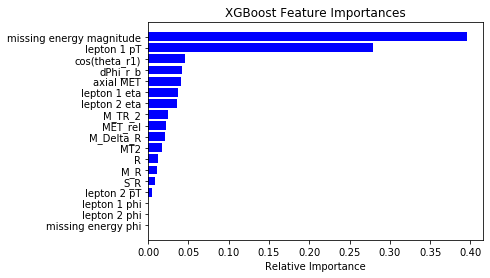

In [16]:
indices = np.argsort(estimator.feature_importances_)
plt.title('XGBoost Feature Importances')
plt.barh(range(len(indices)), estimator.feature_importances_[indices], color='b', align='center')
plt.yticks(range(len(indices)), [estimator.get_booster().feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

It is observed that the most important predictors are 
1. missing energy magniture, which makes sense as it is what we measure to see if there is "invisible particle"
2. lepton 1 pT, which refers to the transverse component of momentum of the first lepton (a visible particle). I m suprised as the importance of lepton 2 pT is low. However, one must note that these 2 leptons are different in charge and thus has different physics. So it is possible that the positive charged lepton plays a more important role here.

It is also seen that the angles at which the leptons are emitted are not important at all. This result can also be seen with the use of another boosting library lightGBM, which I will show later in the report.

It takes 1180.4s for the XGBoost method run. As a result, it would take a huge amount of time to perfect the value of hyperparameters if cross validation is used. Therefore, I would choose LightGBM, which you will see the training time is much shorter, as the final approach in this study. 